<a href="https://colab.research.google.com/github/songqsh/18ma573pub/blob/master/src/bsm_calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- git clone repo to colab

In [1]:
'''======
run once, then comment it off, and run again
========'''
!git clone https://github.com/songqsh/18ma573pub.git 
pass

Cloning into '18ma573pub'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 419 (delta 78), reused 1 (delta 0), pack-reused 294
Receiving objects: 100% (419/419), 667.62 KiB | 15.90 MiB/s, done.
Resolving deltas: 100% (233/233), done.


- Change working dir to "reponame/src", also needs run once, and comment it out from the second run.

In [2]:
cd 18ma573pub/src/

/content/18ma573pub/src


- here we import our own python modules and common modules

In [0]:
from european_options_class import VanillaOption
from sde_class import Gbm
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so

- Read data from .dat file. It has call option prices of
  - maturities 2 months and 5 months;
  - strikes of 97, 99, 101, 103

In [4]:
'''======
Read data
========='''
#Read four-column data
#columns are otype, maturity, strike, option_price
np_option_data1 = np.loadtxt('optiondata2.dat', comments='#', delimiter=',')

print('>>>>>>otype, maturity, strike, option_price')
print(np_option_data1)

>>>>>>otype, maturity, strike, option_price
[[  1.           0.16666667  97.           5.32705461]
 [  1.           0.16666667  99.           3.86224255]
 [  1.           0.16666667 101.           2.7204371 ]
 [  1.           0.16666667 103.           2.1202793 ]
 [  1.           0.41666667  97.           7.23756307]
 [  1.           0.41666667  99.           5.95053461]
 [  1.           0.41666667 101.           5.2640122 ]
 [  1.           0.41666667 103.           4.97493422]]


- We also need to give spot price and interest rate before the computation.

In [0]:
'''==============
below are from the market data for underlying process
================='''
gbm1 = Gbm(
    init_state = 100, #market data
    drift_ratio = .05, #market data
    vol_ratio = .1 #initial guess
)

- creat option_list from the data

In [0]:
num_row = np_option_data1.shape[0]
option_list1 = []

for i in range(num_row):
  option1 = VanillaOption(
      otype = np_option_data1[i,0],
      strike = np_option_data1[i,2],
      maturity = np_option_data1[i,1],
      market_price = np_option_data1[i,3]
  )
      
  option_list1.append(option1) 
  

- Define calibration method

In [0]:
'''==========
define a method for error function
============'''

def error_function(vol, gbm, option_list):
  gbm.vol_ratio = vol
  err1 = 0
  for i in np.arange(len(option_list)):
    err1 = err1 + ((option_list[i]).market_price - gbm.bsm_price(option_list[i]))**2    
  return err1

In [0]:
'''==========
define a method to seek for a calibrated volatility
============'''

def bsm_calibration(gbm, option_list):
  init_vol = .1 #initial guess
  return so.fmin(error_function, init_vol, args = (gbm, option_list), disp = 0)[0]

- filtering out options of 2-mon maturity

In [9]:
# Take options of 2-mon maturity
filter1 = list(filter(lambda x: x.maturity == 2/12, option_list1))
calibrated_volatility1 = bsm_calibration(gbm1, filter1)
print('>>>>>>>> calibrated_volatility is ' + str(calibrated_volatility1))

>>>>>>>> calibrated_volatility is 0.18109375000000028


In [10]:
gbm1.vol_ratio = calibrated_volatility1

#find calibrated option price
filter1_calibrated_price = [gbm1.bsm_price(filter1[i]) for i in range(len(filter1))]
print('>>>>>>>>> this is option price calculated from calibrated vol')
filter1_calibrated_price

>>>>>>>>> this is option price calculated from calibrated vol


[5.184221823763238, 3.9225121216534404, 2.8709333662230563, 2.0297005112870465]

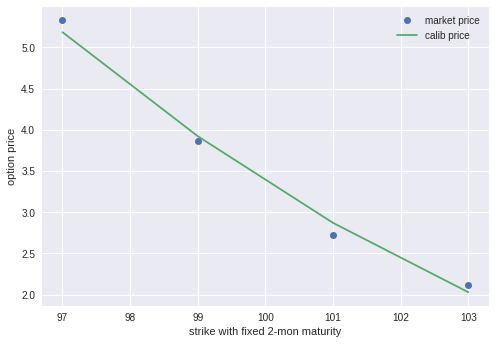

In [11]:
x_co = [filter1[i].strike for i in range(len(filter1))]
y_co = [filter1[i].market_price for i in range(len(filter1))]
plt.plot(x_co, y_co, 'o', label='market price')

y_co = filter1_calibrated_price
plt.plot(x_co, y_co, label = 'calib price')

plt.ylabel('option price')
plt.xlabel('strike with fixed 2-mon maturity')
plt.legend();


- filtering out options of 5-mon maturity

In [12]:
# Take options of 2-mon maturity
filter2 = list(filter(lambda x: x.maturity == 5/12, option_list1))
calibrated_volatility2 = bsm_calibration(gbm1, filter2)
print('>>>>>>>> calibrated_volatility is ' + str(calibrated_volatility2))

>>>>>>>> calibrated_volatility is 0.1839843750000003


In [13]:
gbm1.vol_ratio = calibrated_volatility2

#find calibrated option price
filter2_calibrated_price = [gbm1.bsm_price(filter2[i]) for i in range(len(filter2))]
print('>>>>>>>>> this is option price calculated from calibrated vol')
filter2_calibrated_price

>>>>>>>>> this is option price calculated from calibrated vol


[7.540104147003916, 6.340281448569769, 5.270421573192927, 4.330492653848275]

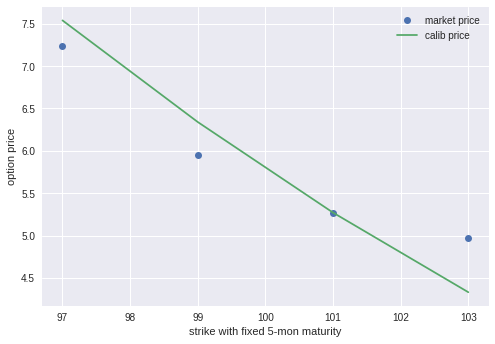

In [14]:
x_co = [filter2[i].strike for i in range(len(filter2))]
y_co = [filter2[i].market_price for i in range(len(filter2))]
plt.plot(x_co, y_co, 'o', label='market price')

y_co = filter2_calibrated_price
plt.plot(x_co, y_co, label = 'calib price')

plt.ylabel('option price')
plt.xlabel('strike with fixed 5-mon maturity')
plt.legend();
